# Child Speech Patterns

I wanted to learn more about Natural Language Processing and applying it to speech development in children. This notebook is my first attempt at findings patterns of children's speech at different ages and possibly predicting the age of a child based on speech patterns.

I found some transcripts of kids talking with their moms at childes.talkbank.org. 

I chose to only look at the children's speech in this study, so the text is made up of only the child's speech (not the mom's speech).

## Importing Necessary Libraries 

In [216]:
import numpy as np
import pandas as pd
pd.set_option('display.width', 2000)
from datetime import time
import urllib.request, urllib.parse, urllib.error
from bs4 import BeautifulSoup
import re
from collections import Counter
from nltk import word_tokenize, FreqDist, pos_tag
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib


%matplotlib inline

## Importing Transcripts From childes.talkbank.org

In [218]:
main_url = 'https://childes.talkbank.org/browser/index.php?url=Eng-NA/Bloom73/'

def grab_html(url):
    """
    Args:
        url (str) - website address
    Returns:
        soup (soup object)
    """
    
    html = urllib.request.urlopen(url).read()
    soup = BeautifulSoup(html, 'html.parser')
    return soup


main_soup = grab_html(main_url)


# Retrieve the links to all transcripts
link_list = []
for a in main_soup.find_all('a', href = True)[4:]:
    link_list.append(a['href'])

print('There are %d links (transcripts).\n' % len(link_list))
print(link_list)
print('\nJust a second...')


# Get the html for each of the found transcripts
soup_list = []
for link in link_list:
    soup = grab_html(link)
    soup_list.append(soup)
    
print('\nAdded %d transcripts to our list.' % len(soup_list))

There are 6 links (transcripts).

['https://childes.talkbank.org/browser/index.php?url=Eng-NA/Bloom73/010421.cha', 'https://childes.talkbank.org/browser/index.php?url=Eng-NA/Bloom73/010714.cha', 'https://childes.talkbank.org/browser/index.php?url=Eng-NA/Bloom73/010821.cha', 'https://childes.talkbank.org/browser/index.php?url=Eng-NA/Bloom73/011000.cha', 'https://childes.talkbank.org/browser/index.php?url=Eng-NA/Bloom73/020400.cha', 'https://childes.talkbank.org/browser/index.php?url=Eng-NA/Bloom73/021000.cha']

Just a second...

Added 6 transcripts to our list.


## Cleaning Up the Transcripts to Include Only The Child's Speech

In [219]:
# Filter html to just the speech parts
speech_list = []
for soup in soup_list:
    speech = soup.find('pre').text
    speech_list.append(speech)

    
# Filter speech to get just the child's speech
child_speech_list = []
speech_labels = []
for speech in speech_list:
    child_speech_list.append(re.findall('\*CHI:\t(.*)', speech))
    speech_labels.append(str(re.findall('CHI\|(.*?)\\|', speech)))
    
speech_labels = [re.sub('\[|\]|', '', label) for label in speech_labels] 
speech_labels = [label.replace("'", '') for label in speech_labels]
#speech_labels = [time.strptime(label, %y %m %d) for label in speech_labels]

#d = datetime.strptime('2007-07-18 10:03:19', '%Y-%m-%d %H:%M:%S')
#day_string = d.strftime('%Y-%m-%d')

#time.strptime("30 Nov 00", "%d %b %y")   

print(speech_labels)

['1;4.21', '1;7.14', '1;8.21', '1;10.0', '2;4.0', '2;10.0']


In [283]:
# remove the space and period after every utterance

child_speech_list = [[re.sub('\s\.', '', line) for line in speech] 
                     for speech in child_speech_list]

# remove the comments made in square brackets (ie [grunting])
child_speech_list = [[re.sub('\[.*\]', '', line) for line in speech] 
                     for speech in child_speech_list]

child_speech_list = [[re.sub('0', 'oh', line) for line in speech] 
                     for speech in child_speech_list]


# remove symbols within speech (ie .@<[]&+!() )


print(child_speech_list[5])

['is it gonna come on now', 'is it gonna come on now', 'me', 'yeh', 'maybe wait when it comes on', 'when me comes on', 'yeh', 'not now maybe later', 'no maybe later and and I may eat a cookie up first', 'and I may eat a cookie up', 'and sit on the bench', 'yeh', 'okay', 'xxx', 'now take the raisins out', 'and this', 'xxx', 'xxx', 'oh', 'you can take the xxx', 'maybe this napkin', "I think I'll have this one", 'now this one this xxx', 'but this yyy is okay', 'I wrap it up', 'and close it too', 'I wan put it right in here', "I don't want my raisin snack", 'gonna sit up here', 'sit up here with me', 'want some juice', 'want some juice', 'yeh', 'I take my cup', 'and go up', 'this is green cup', 'green cup', 'I need a straw', 'shall I help you pour it', 'oh', 'drink some juice', 'there (i)s some in there', 'yes', 'would you like a green cup ', 'I have a green', 'here (i)s a <green cup> ', "no I'll help you pour", 'is that too much', 'pour', 'me so much', 'like I pour you some yyy', 'I pour 

## Create a DataFrame

In [309]:
child1_df = pd.DataFrame()
child1_df['age'] = speech_labels

child1_df

,age
0,1;4.21
1,1;7.14
2,1;8.21
3,1;10.0
4,2;4.0
5,2;10.0


## Number of Utterances within a Speech

,age,utterance_count
0,1;4.21,507
1,1;7.14,410
2,1;8.21,486
3,1;10.0,347
4,2;4.0,322
5,2;10.0,457


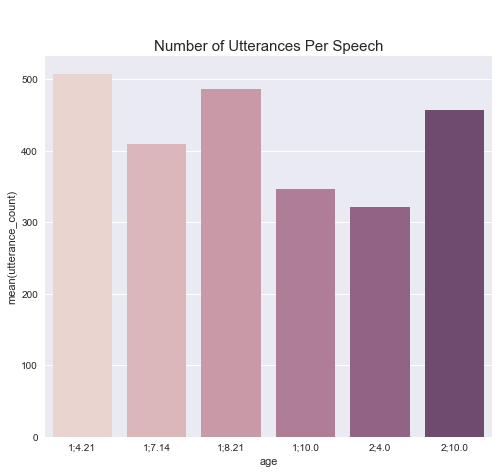

In [310]:
child1_df['utterance_count'] = [len(speech) for speech in child_speech_list]

child1_df

fig = plt.figure(figsize=(8, 7))
_ = sns.barplot(x = 'age', y = 'utterance_count', palette = sns.cubehelix_palette(8), data = child1_df)
_ = plt.title('\n\nNumber of Utterances Per Speech', size = 15)

## Total Word Count

,age,utterance_count,word_count
0,1;4.21,507,588
1,1;7.14,410,459
2,1;8.21,486,560
3,1;10.0,347,539
4,2;4.0,322,1026
5,2;10.0,457,1694


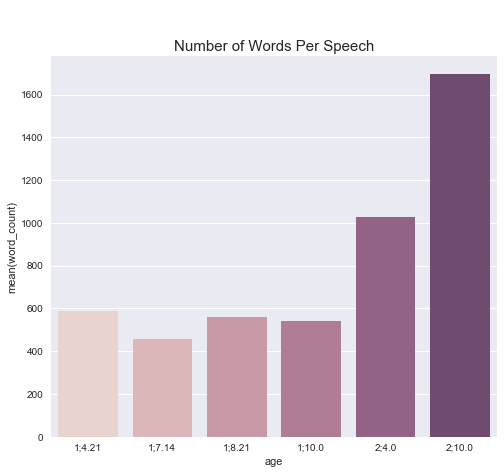

In [312]:
def word_count(speech):
    """
    Args:
        speech (str or list object) - speech corpus
    Returns:
        word count per speech (float)
    """
    
    word_count = []
    
    for line in speech:
        count = len(line.split())
        word_count.append(count)

    return sum(word_count)


child1_df['word_count'] = [word_count(speech) for speech in child_speech_list]

child1_df


fig = plt.figure(figsize=(8, 7))
_ = sns.barplot(x = 'age', y = 'word_count', palette = sns.cubehelix_palette(8), data = child1_df)
_ = plt.title('\n\nNumber of Words Per Speech', size = 15)
plt.show()

## Average Number of Words per Utterance

,age,utterance_count,word_count,avg_word_count,avg_word/utterance
0,1;4.21,507,588,1.159763,1.159763
1,1;7.14,410,459,1.119512,1.119512
2,1;8.21,486,560,1.152263,1.152263
3,1;10.0,347,539,1.553314,1.553314
4,2;4.0,322,1026,3.186335,3.186335
5,2;10.0,457,1694,3.706783,3.706783


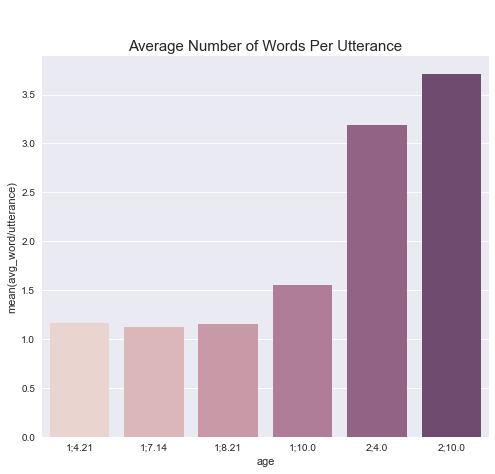

In [315]:



child1_df['avg_word/utterance'] = child1_df['word_count'] / child1_df['utterance_count']
child1_df


fig = plt.figure(figsize=(8, 7))
_ = sns.barplot(x = 'age', y = 'avg_word/utterance', palette = sns.cubehelix_palette(8), data = child1_df)
_ = plt.title('\n\nAverage Number of Words Per Utterance', size = 15)
plt.show()

## Average Length of Words in Speech  -- NEED TO FINISH

,age,utterance_count,avg_word_count
0,1;4.21,507,1.159763
1,1;7.14,410,1.119512
2,1;8.21,486,1.152263
3,1;10.0,347,1.553314
4,2;4.0,322,3.186335
5,2;10.0,457,3.706783


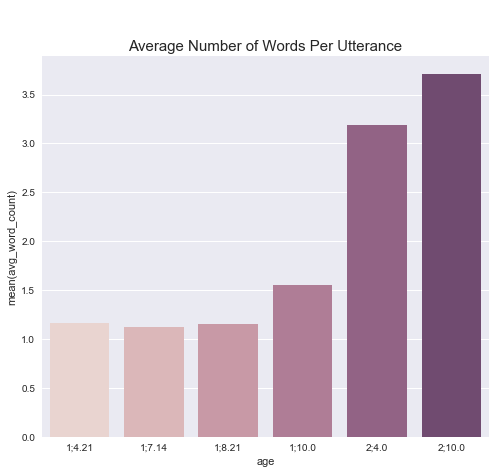

In [297]:
def avg_letters_word(speech):
    """
    Args:
        speech (str or list object) - speech corpus
    Returns:
        average word length speech(float)
    """
    
    letter_count = []
    
    for line in speech:
        words = line.split()
        for word in words:
            letters = list(word)
            num_letters = len(letters)
            letter_count.append(num_letters)
    
    return sum(letter_count)


child1_df['avg_word_count'] = [avg_word_count(speech) for speech in child_speech_list]

child1_df


#fig = plt.figure(figsize=(8, 7))
#_ = sns.barplot(x = 'age', y = 'avg_word_count', palette = sns.cubehelix_palette(8), data = child1_df)
#_ = plt.title('\n\nAverage Number of Words Per Utterance', size = 15)
#plt.show()

## Words Used Most Frequently

In [298]:
def top_10(speech):
    """
    Args:
        speech (str or list object) - speech corpus
    Returns:
        list of top 10 most frequent words (list)
    """
    
    words_list = []
    for line in speech:
        words = line.split()
        for word in words:
            words_list.append(word)
        
    freq_dist = FreqDist(words_list)
    most_freq = []
    for word in freq_dist.most_common(10):
        most_freq.append(word)
    print('Most Frequent Words:\n', most_freq, '\n')
    return most_freq


child1_df['top_10_words'] = [top_10(speech) for speech in child_speech_list]

child1_df


Most Frequent Words:
 [('xxx', 51), ('up', 48), ('oh', 43), ('ehwideh@c', 40), ('more', 39), ('there', 34), ('no', 33), ('wideh@c', 29), ('down', 27), ('baby', 27)] 

Most Frequent Words:
 [('baby', 43), ('Mommy', 34), ('oh', 29), ('no', 26), ('!', 25), ('there', 24), ('down', 20), ('man', 18), ('Mary', 14), ('up', 13)] 

Most Frequent Words:
 [('baby', 49), ('Mommy', 33), ('doll', 27), ('no', 24), ('oh', 22), ('up', 21), ('!', 17), ('diaper', 16), ('sit', 15), ('Allison', 14)] 

Most Frequent Words:
 [('baby', 36), ('oh', 33), ('truck', 26), ('Mommy', 19), ('eat', 18), ('cookie', 18), ('no', 16), ('cow', 16), ('!', 14), ('juice', 11)] 

Most Frequent Words:
 [('want', 46), ('I', 39), ('and', 31), ('oh', 27), ('it', 24), ('no', 23), ('xxx', 23), ('some', 20), ('right', 18), ('yyy', 17)] 

Most Frequent Words:
 [('it', 91), ('I', 84), ('the', 54), ('xxx', 52), ('you', 42), ('(i)s', 33), ('on', 32), ('and', 32), ('a', 28), ('oh', 28)] 



,age,utterance_count,avg_word_count,top_10_words
0,1;4.21,507,1.159763,"[(xxx, 51), (up, 48), (oh, 43), (ehwideh@c, 40..."
1,1;7.14,410,1.119512,"[(baby, 43), (Mommy, 34), (oh, 29), (no, 26), ..."
2,1;8.21,486,1.152263,"[(baby, 49), (Mommy, 33), (doll, 27), (no, 24)..."
3,1;10.0,347,1.553314,"[(baby, 36), (oh, 33), (truck, 26), (Mommy, 19..."
4,2;4.0,322,3.186335,"[(want, 46), (I, 39), (and, 31), (oh, 27), (it..."
5,2;10.0,457,3.706783,"[(it, 91), (I, 84), (the, 54), (xxx, 52), (you..."


## Parts of Speech

In [299]:
child1_df['%nouns'] = np.NaN
child1_df['%verbs'] = np.NaN
child1_df['%adverbs'] = np.NaN
child1_df['%adjectives'] = np.NaN
child1_df['%prepositions'] = np.NaN
child1_df['%pronouns'] = np.NaN
child1_df['%other'] = np.NaN


def pos_count(speech):
    """
    Args:
        speech (str or list object) - speech corpus
    Returns:
        A count of the number of parts of speech used (ie nouns, verbs) (int)
    """
    
    words_list = []
    for line in speech:
        words = line.split()
        for word in words:
            words_list.append(word)
    
    pos_list = []
    tagged = pos_tag(words_list)
    #print(tagged)
    
    # Initalize POS Count
    nouns = 0
    verbs = 0
    adverbs = 0
    adjectives = 0
    prepositions = 0
    pronouns = 0
    other = 0
    total = 0
    
    # Count POS
    for word, tag in tagged:
        total += 1
        if tag in ['NN', 'NNS', 'NNP', 'NNPS']:
            nouns += 1
        elif tag in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']:
            verbs += 1
        elif tag in ['RB', 'RBR', 'RBS', 'RP', 'WRB']:
            adverbs += 1
        elif tag in ['JJ', 'JJR', 'JJS']:
            adjectives += 1
        elif tag in ['IN']:
            prepositions += 1
        elif tag in ['PRP', 'PRP$', 'WP', 'WP$']:
            pronouns += 1
        else:
            other += 1
    
    # Record POS count as a percentage in dataframe
    child1_df.loc[i, '%nouns'] = nouns / total * 100
    child1_df.loc[i, '%verbs'] = verbs / total * 100
    child1_df.loc[i, '%adverbs'] = adverbs / total * 100
    child1_df.loc[i, '%adjectives'] = adjectives / total * 100
    child1_df.loc[i, '%prepositions'] = prepositions / total * 100
    child1_df.loc[i, '%pronouns'] = pronouns / total * 100
    child1_df.loc[i, '%other'] = other / total * 100
    
i = 0
for speech in child_speech_list:
    pos_count(speech)
    i += 1

child1_df

,age,utterance_count,avg_word_count,top_10_words,%nouns,%verbs,%adverbs,%adjectives,%prepositions,%pronouns,%other
0,1;4.21,507,1.159763,"[(xxx, 51), (up, 48), (oh, 43), (ehwideh@c, 40...",36.564626,10.374150,25.000000,15.986395,2.380952,0.000000,9.693878
1,1;7.14,410,1.119512,"[(baby, 43), (Mommy, 34), (oh, 29), (no, 26), ...",49.237473,6.318083,15.032680,11.328976,2.178649,0.435730,15.468410
2,1;8.21,486,1.152263,"[(baby, 49), (Mommy, 33), (doll, 27), (no, 24)...",61.428571,6.607143,8.928571,9.821429,4.464286,0.357143,8.392857
3,1;10.0,347,1.553314,"[(baby, 36), (oh, 33), (truck, 26), (Mommy, 19...",54.359926,11.688312,7.050093,14.285714,3.896104,0.185529,8.534323
4,2;4.0,322,3.186335,"[(want, 46), (I, 39), (and, 31), (oh, 27), (it...",23.879142,20.662768,10.916179,8.382066,6.140351,13.352827,16.666667
5,2;10.0,457,3.706783,"[(it, 91), (I, 84), (the, 54), (xxx, 52), (you...",18.654073,23.494687,9.090909,4.899646,7.201889,19.952774,16.706021


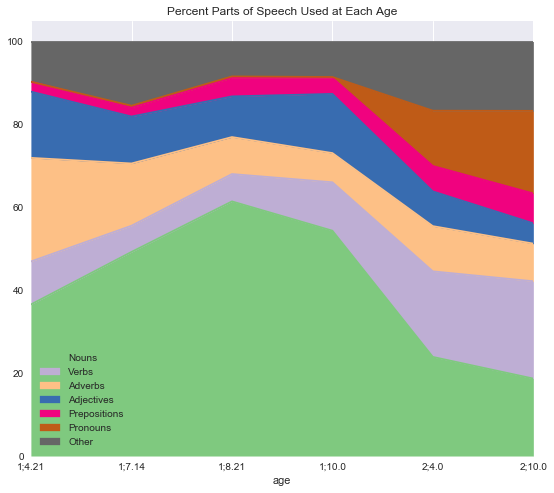

In [307]:
pos_df = child1_df[['age', '%nouns', '%verbs', '%adverbs', '%adjectives',
                       '%prepositions', '%pronouns', '%other']]

pos_df = pos_df.set_index('age')
pos_df.columns = ['Nouns', 'Verbs', 'Adverbs', 'Adjectives', 'Prepositions',
                  'Pronouns', 'Other']

_ = pos_df.plot.area(figsize = [9, 8], colormap = 'Accent', title = 'Percent Parts of Speech Used at Each Age')